In [9]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/rerkki/data-analytics-ml/refs/heads/main/datasets/winequality-red.csv", encoding='latin-1')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Task
Perform a multi-linear regression analysis on the `df` DataFrame to predict the 'quality' column, including data preparation, model training, evaluation, and visualization of predictions and feature coefficients.

## Prepare Data for Regression

### Subtask:
Separate the features (independent variables) from the target variable ('quality') and then split the dataset into training and testing sets. We will use a standard split (e.g., 80% train, 20% test) initially, but we can experiment with different splits later as you suggested.


**Reasoning**:
To prepare the data for regression, first separate the features (X) from the target variable (y), then split them into training and testing sets using `train_test_split` from `sklearn.model_selection`.



In [10]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1279, 11)
X_test shape: (320, 11)
y_train shape: (1279,)
y_test shape: (320,)


## Train Multi-linear Regression Model

### Subtask:
Initialize and train a multi-linear regression model using the training data. This step will fit the model to learn the relationships between the features and the 'quality' target.


**Reasoning**:
Import the `LinearRegression` class, instantiate it, and then train the model using the provided training data (`X_train` and `y_train`) to satisfy the subtask instructions.



In [11]:
from sklearn.linear_model import LinearRegression

# Instantiate a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

print("Multi-linear regression model trained successfully.")

Multi-linear regression model trained successfully.


## Evaluate Model Performance and Interpret Coefficients

### Subtask:
Make predictions on the test set and evaluate the model's performance using metrics such as R-squared and Mean Squared Error. Critically, we will also analyze the regression coefficients to identify and interpret the most significant predictors of wine quality.


**Reasoning**:
First, use the trained model to make predictions on the test set (`X_test`) to get `y_pred`.



In [12]:
y_pred = model.predict(X_test)
print("Predictions on the test set made successfully.")

Predictions on the test set made successfully.


**Reasoning**:
Now that predictions have been made, calculate the R-squared score and Mean Squared Error to evaluate the model's performance. Then, retrieve and display the model's coefficients and intercept to understand feature importance.



In [13]:
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Calculate R-squared score
r_squared = r2_score(y_test, y_pred)
print(f"R-squared score: {r_squared:.4f}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Access coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print(f"\nModel Intercept: {intercept:.4f}")

# Create a DataFrame for coefficients and sort by absolute magnitude
coeff_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})
coeff_df['Absolute_Coefficient'] = abs(coeff_df['Coefficient'])
coeff_df = coeff_df.sort_values(by='Absolute_Coefficient', ascending=False)

print("\nFeature Coefficients (sorted by absolute magnitude):")
print(coeff_df[['Feature', 'Coefficient']].to_string(index=False))

R-squared score: 0.4032
Mean Squared Error (MSE): 0.3900

Model Intercept: 14.3551

Feature Coefficients (sorted by absolute magnitude):
             Feature  Coefficient
             density   -10.351594
           chlorides    -1.806503
    volatile acidity    -1.001304
           sulphates     0.841172
                  pH    -0.393688
             alcohol     0.281890
         citric acid    -0.140821
       fixed acidity     0.023085
      residual sugar     0.006564
 free sulfur dioxide     0.005627
total sulfur dioxide    -0.003644


## Visualize Model Predictions

### Subtask:
Generate a scatter plot comparing the actual 'quality' values against the model's predicted 'quality' values from the test set. This visualization will help assess the model's accuracy and identify any patterns in its predictions.


**Reasoning**:
To visualize the model's performance, generate a scatter plot comparing actual vs. predicted 'quality' values, including a diagonal line for perfect prediction, and then display it to the user. This aligns with the subtask's objective of assessing model accuracy and identifying patterns.



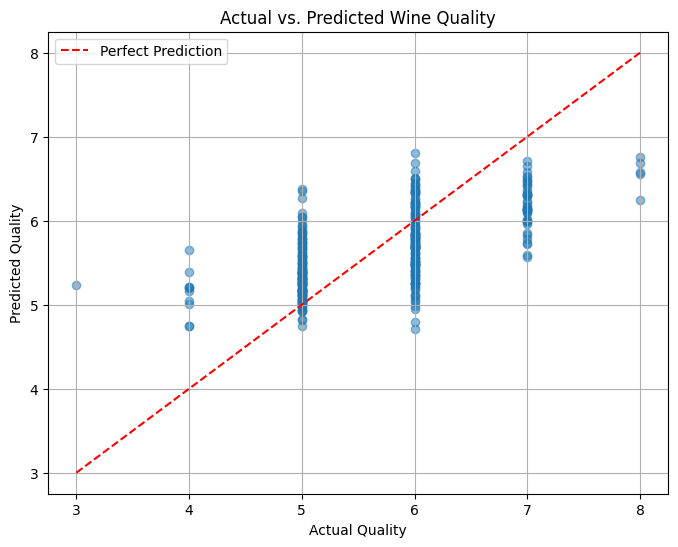

In [14]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)

# Add a diagonal line for perfect prediction
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

# Add title and labels
plt.title('Actual vs. Predicted Wine Quality')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.legend()
plt.grid(True)
plt.show()

## Visualize Feature Coefficients

### Subtask:
Create a bar chart to visualize the coefficients of the features from the trained regression model. This will clearly show the magnitude and direction of each feature's impact on the 'quality' variable, highlighting the most significant predictors.


**Reasoning**:
To visualize the feature coefficients as requested, create a bar chart using `matplotlib.pyplot` with 'Feature' on the x-axis and 'Coefficient' on the y-axis from the `coeff_df` DataFrame.



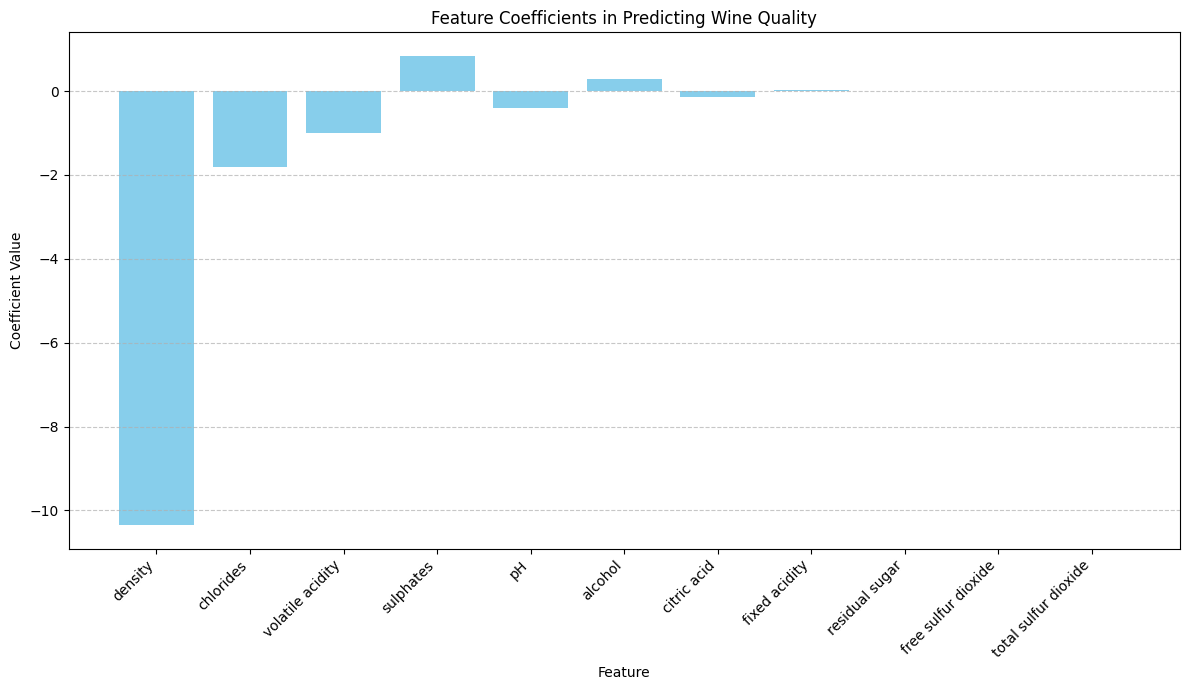

In [15]:
import matplotlib.pyplot as plt

# Create a bar chart for feature coefficients
plt.figure(figsize=(12, 7))
plt.bar(coeff_df['Feature'], coeff_df['Coefficient'], color='skyblue')

# Add labels and title
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Feature Coefficients in Predicting Wine Quality')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Correlation Map of Variables

### Subtask:
Create a heatmap to visualize the correlation matrix of all variables in the `df` DataFrame. This will help understand the relationships between the features and the target variable, as well as multicollinearity among features.

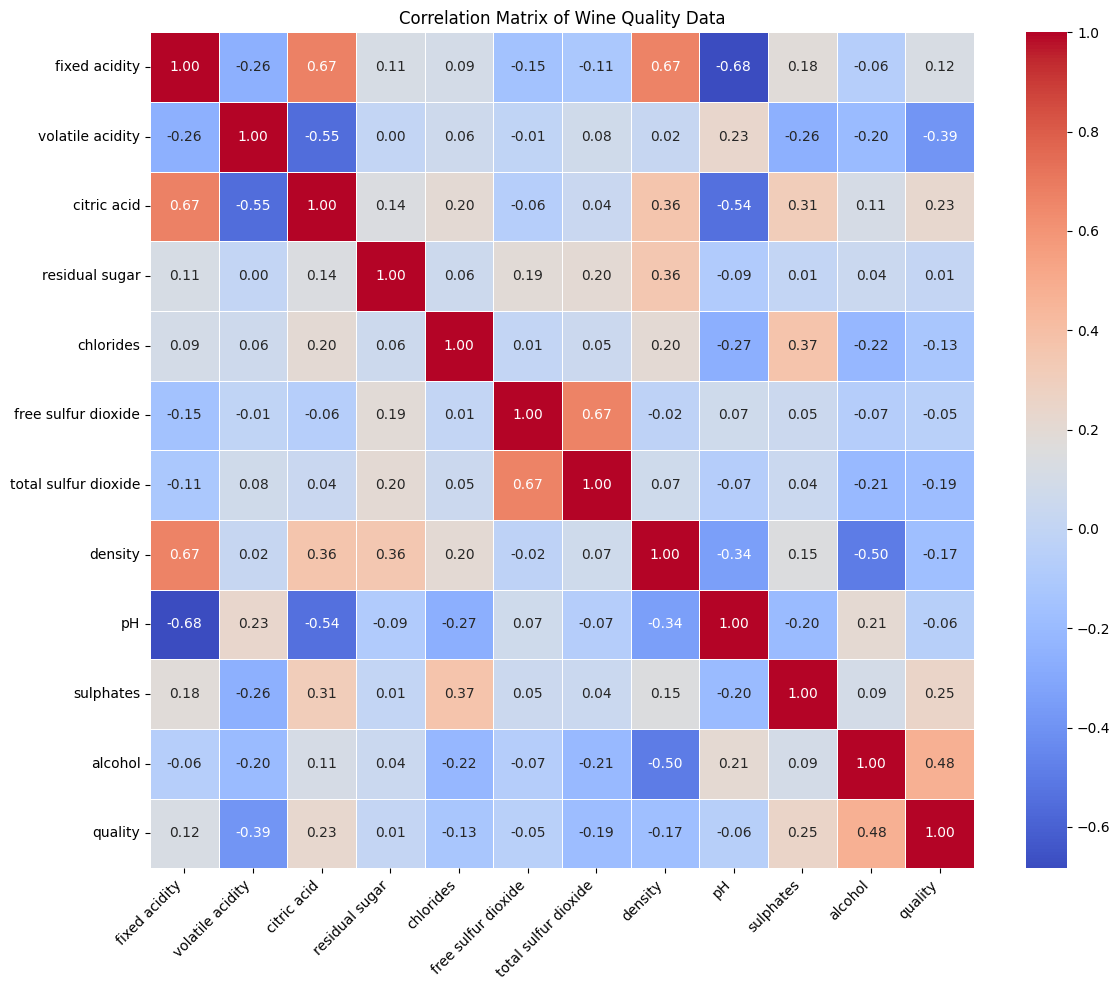

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5)

plt.title('Correlation Matrix of Wine Quality Data')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Final Task

Summarize the findings from the regression and correlation analyses and compare the results from both analyses.

Evaluate the regression model performance (R squared). Can the performance improved by different train/test splits?
